In [1]:
# Import relevant libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.metrics import structural_similarity as compare_ssim
import cv2
import copy
import pandas as pd
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
# Function for producing differenced image at RGB color channels

def img_diff(orig_image, new_image):
    # Convert images to grayscale
    imageA = copy.deepcopy(orig_image)
    imageB = copy.deepcopy(new_image)
    grayA = cv2.cvtColor(imageA, cv2.COLOR_RGB2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_RGB2GRAY)

    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")

    # threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Display image differences
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(imageA)
    axarr[0,1].imshow(imageB)
    axarr[1,0].imshow(diff)
    axarr[1,1].imshow(thresh)

    # Return the differenced threshold image
    return thresh

In [3]:
# Load images
img_names1 = ['San_Cristobal-2019-12-22.png','San_Cristobal-2021-01-17.png',
              'San_Cristobal-2021-01-31.png','San_Cristobal-2021-02-07.png',
              'San_Cristobal-2021-02-28.png','San_Cristobal-2021-03-07.png']

img_names2 = ['San_Cristobal-2019-12-22-b589.png','San_Cristobal-2021-01-17-b589.png',
              'San_Cristobal-2021-01-31-b589.png','San_Cristobal-2021-02-07-b589.png',
              'San_Cristobal-2021-02-28-b589.png','San_Cristobal-2021-03-07-b589.png']

img_list1 = []
for image in img_names1:
    new_img_string = 'sample_images/' + image
    new_img = plt.imread(new_img_string)
    img_list1.append(new_img)
    
img_list2 = []
for image in img_names2:
    new_img_string = 'sample_images/' + image
    new_img = plt.imread(new_img_string)
    img_list2.append(new_img)

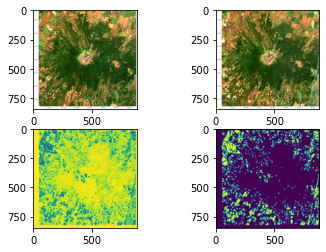

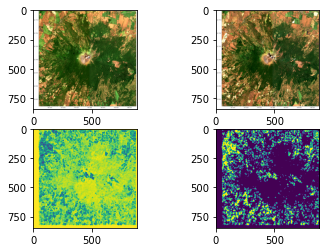

In [6]:
# Test the image differencing function
diff_img1 = img_diff(img_list1[0], img_list1[1])
diff_img2 = img_diff(img_list1[0], img_list1[2])

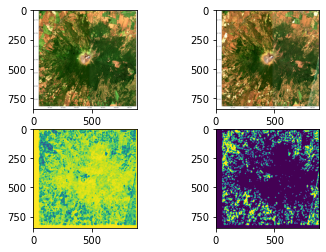

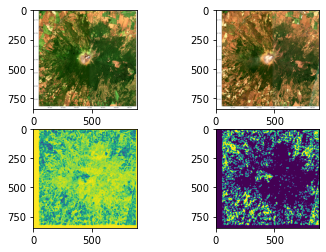

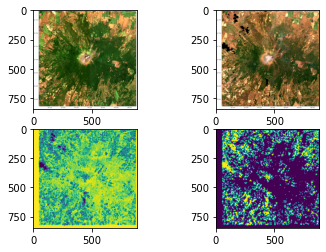

In [7]:
# Test the image differencing function
diff_img3 = img_diff(img_list1[0], img_list1[3])
diff_img4 = img_diff(img_list1[0], img_list1[4])
diff_img5 = img_diff(img_list1[0], img_list1[5])

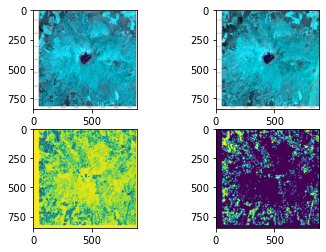

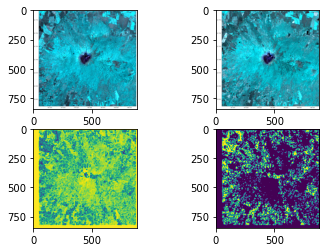

In [8]:
# Test the image differencing function
diff_img1b = img_diff(img_list2[0], img_list2[1])
diff_img2b = img_diff(img_list2[0], img_list2[2])

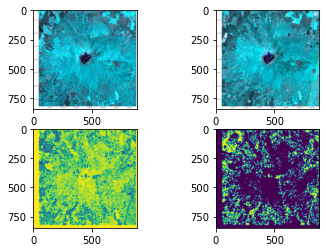

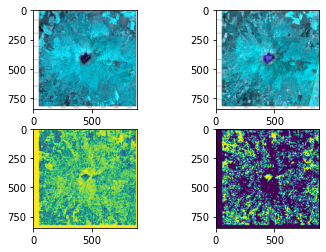

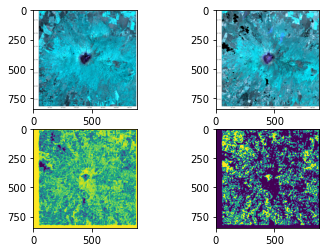

In [9]:
# Test the image differencing function
diff_img3b = img_diff(img_list2[0], img_list2[3])
diff_img4b = img_diff(img_list2[0], img_list2[4])
diff_img5b = img_diff(img_list2[0], img_list2[5])

San_Cristobal-2021-01-17.png
 
X coordinate anchor point: 53
Y coordinate anchor point: 657
Rectangle width: 189
Rectangle height: 148
 
X coordinate anchor point: 49
Y coordinate anchor point: 249
Rectangle width: 92
Rectangle height: 131
 
X coordinate anchor point: 49
Y coordinate anchor point: 13
Rectangle width: 155
Rectangle height: 200
 


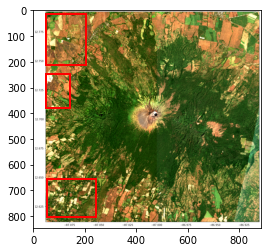

In [27]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the new image
ax.imshow(img_list1[1])

# Find contours of key areas of change
cnts = cv2.findContours(diff_img1b.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = cnts[0] if len(cnts) == 2 else cnts[1]

# Generate array of biggest contoured areas
lentrack = np.array([len(a) for a in cnts2])
majorcnt = np.where(lentrack>=450)[0]

print(img_names1[1])
print(" ")

# Display the biggest contoured areas in red boxes
for i in range(len(majorcnt)):
    # Create a Rectangle patch
    (x, y, w, h) = cv2.boundingRect(cnts2[majorcnt[i]])
    print("X coordinate anchor point: " + str(x))
    print("Y coordinate anchor point: " + str(y))
    print("Rectangle width: " + str(w))
    print("Rectangle height: " + str(h))
    print(" ")
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)    
    
    
plt.show()

San_Cristobal-2021-01-31.png
 
X coordinate anchor point: 85
Y coordinate anchor point: 701
Rectangle width: 113
Rectangle height: 100
 
X coordinate anchor point: 751
Y coordinate anchor point: 135
Rectangle width: 78
Rectangle height: 122
 
X coordinate anchor point: 48
Y coordinate anchor point: 14
Rectangle width: 166
Rectangle height: 343
 


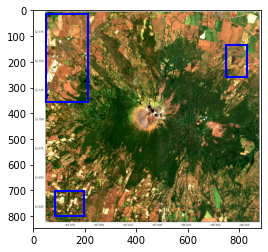

In [34]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the new image
ax.imshow(img_list1[2])

# Find contours of key areas of change
cnts = cv2.findContours(diff_img2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts2 = cnts[0] if len(cnts) == 2 else cnts[1]

# Generate array of biggest contoured areas
lentrack = np.array([len(a) for a in cnts2])
majorcnt = np.where(lentrack>=450)[0]

print(img_names1[2])
print(" ")

# Display the biggest contoured areas in red boxes
for i in range(len(majorcnt)):
    # Create a Rectangle patch
    (x, y, w, h) = cv2.boundingRect(cnts2[majorcnt[i]])
    print("X coordinate anchor point: " + str(x))
    print("Y coordinate anchor point: " + str(y))
    print("Rectangle width: " + str(w))
    print("Rectangle height: " + str(h))
    print(" ")
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='b', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)    
    
    
plt.show()